In [103]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib.lines import Line2D
%matplotlib inline
import matplotlib.pyplot as plt
import re
from matplotlib import gridspec
from scipy.stats import gaussian_kde
import baltic as bt

from matplotlib.patches import Patch
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

In [2]:
palms_all_variables=pd.read_csv('../data_files/palms_alltraits_curated_20220620.csv',sep='\t')
palms_all_variables.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'index', 'species',
       'coordinateUncertaintyInMeters', 'decimalLatitude', 'decimalLongitude',
       'gbifID', 'individualCount',
       ...
       'CHELSA_vpd_min_stand', 'Simard_Pinto_3DGlobalVeg_JGR_stand',
       'MaxStemHeight_m_stand', 'MaxStemDia_cm_stand', 'MaxLeafNumber_stand',
       'Max_Blade_Length_m_stand', 'Max_Rachis_Length_m_stand',
       'Max_Petiole_length_m_stand', 'StemHeightBladeLength_stand',
       'HeightOverCanopy_stand'],
      dtype='object', length=143)

In [3]:
treeFileNexus='../data_files/Clean_1_1_MCCT_nexus.nex'
cc=bt.loadNexus(treeFileNexus,absoluteTime=False,tip_regex='_([0-9\-]+)$') ## treeFile here can alternatively be a path to a local file

cc.treeStats()
cc.drawTree()
cc.sortBranches()


Tree height: 108.328870
Tree length: 18144.538310
strictly bifurcating tree
annotations present

Numbers of objects in tree: 5099 (2549 nodes and 2550 leaves)



In [4]:
tree_spp=[k.name for k in cc.getExternal()]
len(tree_spp)
intree=palms_all_variables[palms_all_variables['tip_name'].isin(tree_spp)]
intree['species']

0             Acrocomia_aculeata
1               Acrocomia_crispa
2              Acrocomia_emensis
3          Acrocomia_glaucescens
4             Acrocomia_hassleri
                  ...           
2190    Verschaffeltia_splendida
2191     Wallaceodoxa_raja-ampat
2192        Wallichia_marianneae
2193          Wallichia_triandra
2194         Wettinia_panamensis
Name: species, Length: 2071, dtype: object

In [5]:
canopy_num={'canopy':1,np.nan:np.nan,'understorey':0}
intree['UnderstoreyCanopy_num']=intree['UnderstoreyCanopy'].map(canopy_num)
intree['UnderstoreyCanopy_num'].unique()

array([ 1.,  0., nan])

In [6]:
list(intree.columns)
intree['shape'].unique()

array(['pinnate', 'entire', 'variable', 'cospalmate', 'bipinnate', nan],
      dtype=object)

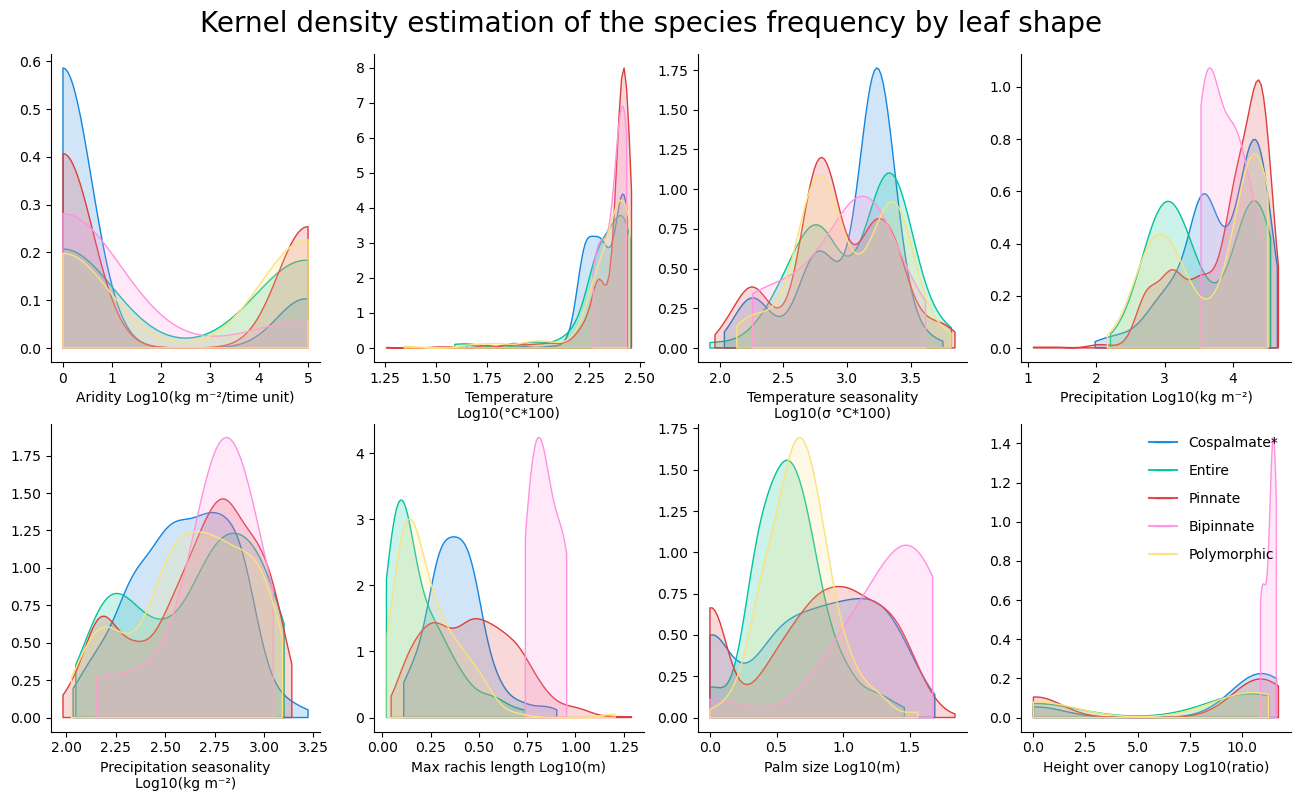

In [7]:
variables=['CHELSA_ai','CHELSA_bio1','CHELSA_bio4','CHELSA_bio12','CHELSA_bio15',
           'Max_Rachis_Length_m','StemHeightBladeLength','HeightOverCanopy']

cols=4
rows=2

fig=plt.figure(figsize=(8*(rows),2.2*(cols)),facecolor='w')
fig.suptitle('Kernel density estimation of the species frequency by leaf shape', size=20,y=0.93)
outer_grid=gridspec.GridSpec(rows,cols, wspace=0.2, hspace=0.2) # nrows, ncols
outer_grid.tight_layout(fig,rect=[0, 0.04, 1, 0.96]) #rect=[0, 0.03, 1, 0.95]

shape_text_dict={'cospalmate':'Cospalmate*','entire':'Entire','pinnate':'Pinnate','variable':'Polymorphic','bipinnate':'Bipinnate'}


shape_colour_dict={'cospalmate':"#1586DE", #light blue
'entire':'#02c39a', # now greensih, old: "#003480", # dark blue
'pinnate':"#dd3d3d",
'bipinnate':"#ff91e2",
'variable':"#fbe279"}

edge_colour_dict={'cospalmate':"#1586DE", #light blue
'entire':'#02c39a', # now greensih, old: "#003480", # dark blue
'pinnate':"#dd3d3d",
'bipinnate':"#ff91e2",
'variable':"#f7ba00"}

variable_dict={'CHELSA_ai':'Aridity Log10(kg m\u207B\u00b2/time unit)',
               'CHELSA_bio1':'Temperature\nLog10(\u00B0C*100)',
               'CHELSA_bio4':'Temperature seasonality\nLog10(\u03C3 \u00B0C*100)',
               'CHELSA_bio12':u'Precipitation Log10(kg m\u207B\u00b2)',
               'CHELSA_bio15':u'Precipitation seasonality\nLog10(kg m\u207B\u00b2)',
               'Max_Rachis_Length_m':'Max rachis length Log10(m)',
               'StemHeightBladeLength': 'Palm size Log10(m)',
               'HeightOverCanopy':'Height over canopy Log10(ratio)'}

for xx in range(0,4,1):
    ax=plt.subplot(outer_grid[0,xx])
    for key,value in shape_colour_dict.items():
        values=intree[intree['shape']==key][variables[xx]].dropna().astype('float').values
#         kde=gaussian_kde(10**values)
#         x_grid=np.linspace(min(10**values),max(10**values),100)
        kde=gaussian_kde(values)
        x_grid=np.linspace(min(values),max(values),100)
        ax.fill_between(x_grid,kde(x_grid),alpha=0.2,edgecolor='none',facecolor=shape_colour_dict[key],label=shape_text_dict[key])
        ax.fill_between(x_grid,kde(x_grid),alpha=1,edgecolor=shape_colour_dict[key],facecolor='none',label=shape_text_dict[key])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xlabel('%s'%(variable_dict[variables[xx]]))
        
for xx in range(0,4,1):
    ax=plt.subplot(outer_grid[1,xx])
    for key,value in shape_colour_dict.items():
        values=intree[intree['shape']==key][variables[xx+4]].dropna().astype('float').values
        kde=gaussian_kde(values)
        x_grid=np.linspace(min(values),max(values),100)
        ax.fill_between(x_grid,kde(x_grid),alpha=0.2,edgecolor='none',facecolor=shape_colour_dict[key],label=shape_text_dict[key])
        ax.fill_between(x_grid,kde(x_grid),alpha=1,edgecolor=shape_colour_dict[key],facecolor='none',label=shape_text_dict[key])
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xlabel('%s'%(variable_dict[variables[xx+4]]))
    if xx+4 == 7:
        legend_elements=[]
        for key,value in shape_colour_dict.items():
            legend_elements.append(Line2D([0],[0],marker='_',color=value,label=shape_text_dict[key],markersize=12,alpha=0.9))
        ax.legend(handles=legend_elements, loc=1,labelspacing=1,frameon=False)

# plt.savefig('../data_files/Fig_1_KDEraw_202220908.pdf',dpi=300)
plt.show()

In [8]:
intree.groupby(by='shape')[variables].median().apply(lambda x: 10**x).reset_index()

,shape,CHELSA_ai,CHELSA_bio1,CHELSA_bio4,CHELSA_bio12,CHELSA_bio15,Max_Rachis_Length_m,StemHeightBladeLength,HeightOverCanopy
0,bipinnate,1.000000,250.959658,1365.191562,7008.107341,623.247543,7.000000,28.622544,2.827366e+11
1,cospalmate,1.000000,211.500000,1474.000000,8227.000000,405.000000,2.400000,7.000000,7.000000e+10
2,entire,1.000000,246.500000,1514.000000,2940.000000,521.000000,1.329962,3.819987,1.350000e+10
3,pinnate,1.000000,257.000000,750.491839,12194.983600,518.499759,2.900000,7.389993,4.064997e+10
4,variable,100000.025091,252.500000,836.000000,12243.000000,481.500000,1.550000,4.614997,1.750000e+10


In [9]:
intree.groupby(by='shape')[variables].max().apply(lambda x: 10**x).reset_index()

,shape,CHELSA_ai,CHELSA_bio1,CHELSA_bio4,CHELSA_bio12,CHELSA_bio15,Max_Rachis_Length_m,StemHeightBladeLength,HeightOverCanopy
0,bipinnate,100001.548709,272.0,4102.0,28172.5,1115.0,9.0,47.00,4.600000e+11
1,cospalmate,100003.433253,274.5,5608.5,44539.0,1670.0,8.0,48.75,4.710000e+11
2,entire,100002.855431,284.5,6536.5,35492.0,1263.0,5.5,28.80,2.000000e+11
3,pinnate,100003.976216,287.5,6973.0,46257.0,1382.5,19.5,69.12,5.820000e+11
4,variable,100002.408126,281.5,6484.0,32427.0,1240.0,16.0,36.40,1.934000e+11


In [10]:
intree.groupby(by='shape')[variables].min().apply(lambda x: 10**x).reset_index()

,shape,CHELSA_ai,CHELSA_bio1,CHELSA_bio4,CHELSA_bio12,CHELSA_bio15,Max_Rachis_Length_m,StemHeightBladeLength,HeightOverCanopy
0,bipinnate,1.0,186.5,181.0,3403.0,141.5,5.50,1.0,8.000000e+10
1,cospalmate,1.0,44.5,109.0,96.0,108.0,1.29,1.0,1.000000e+00
2,entire,1.0,39.0,84.0,161.0,111.5,1.05,1.0,1.000000e+00
3,pinnate,1.0,18.0,92.0,12.0,96.0,1.11,1.0,1.000000e+00
4,variable,1.0,22.0,136.5,145.0,106.0,1.06,1.0,1.000000e+00


In [11]:
# print(list(intree.columns))
cold=['Trachycarpeae','Areceae','Ceroxyleae'] # species that can resist the coldest temperatures in the palm's range
intree[intree['PalmTribe'].isin(cold)].groupby(by=['shape']).count()[['species']]

,species
shape,
cospalmate,291
entire,50
pinnate,621
variable,57


Trachycarpus fortunei, one of the most cold tolerant of all cultivated palms, is hardy in the British Isles

Rhapidophyllum, Common names and uses: Needle palm. Cultivated as a cold-tolerant ornamental

Mesocarp of Butia capitata is edible and can be made into jams; several species are widespread as slow-growing cold-tolerant ornamentals.

Parajubaea torallyi is found in humid ravines of spectacular sandstone mountains at high elevations (2400–3400 m), where it does not rain for ten months of the year,. These palms should make handsome ornamentals in cold and dry areas.



In [12]:
intree[variables].max().apply(lambda x: 10**x).astype('int')

CHELSA_ai                      100003
CHELSA_bio1                       287
CHELSA_bio4                      6972
CHELSA_bio12                    46257
CHELSA_bio15                     1670
Max_Rachis_Length_m                19
StemHeightBladeLength              69
HeightOverCanopy         582000000001
dtype: int64

In [13]:
intree[variables].min().apply(lambda x: 10**x).astype('int')

CHELSA_ai                 1
CHELSA_bio1              17
CHELSA_bio4              83
CHELSA_bio12             12
CHELSA_bio15             96
Max_Rachis_Length_m       1
StemHeightBladeLength     1
HeightOverCanopy          1
dtype: int64

In [14]:
intree.drop(intree[intree['shape']=='bipinnate'].index,axis=0,inplace=True)
intree['shape'].unique()

array(['pinnate', 'entire', 'variable', 'cospalmate', nan], dtype=object)

In [15]:
def boxes(xbase,column,ax=ax,color='#5e5d5d'):
    """creates box plots around
    column is a pandas column"""
    base=column.quantile(0.25)
    height=column.quantile(0.75)-base
    median=column.median()
    
    ax.plot(xbase,median,marker='o',color='k',markersize=6)
    plt.vlines(xbase,column.min(),base,color=color,lw=1)
    ax.plot(xbase,column.min(),marker='o',color=color,markersize=4)
    plt.vlines(xbase,column.quantile(0.75),column.max(),color=boxcolor,lw=1)
    ax.plot(xbase,column.max(),marker='o',color=color,markersize=4)

    box=mpl.patches.Rectangle((xbase-(width/2),base),width,height,facecolor='none',edgecolor=color,lw=1) #shape_colour_dict[shape]) #616161
    
    return ax.add_patch(box)

def kde_plot(xbase,column,alpha=0.6,edgecolor='k',facecolor='w',linewidth=1,ax=ax):
    """plots kdes for a pandas column"""
    values=column.dropna().values
    kde=gaussian_kde(values)
    y_grid=np.linspace(min(values),max(values),100)
    ax.fill_betweenx(y_grid,x1=-kde(y_grid)+xbase,x2=xbase,alpha=alpha,edgecolor=edgecolor,
                     facecolor=facecolor,linewidth=linewidth)
    ax.fill_betweenx(y_grid,x1=kde(y_grid)+xbase,x2=xbase,alpha=alpha,edgecolor=edgecolor,
                     facecolor=facecolor,linewidth=linewidth)

findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.


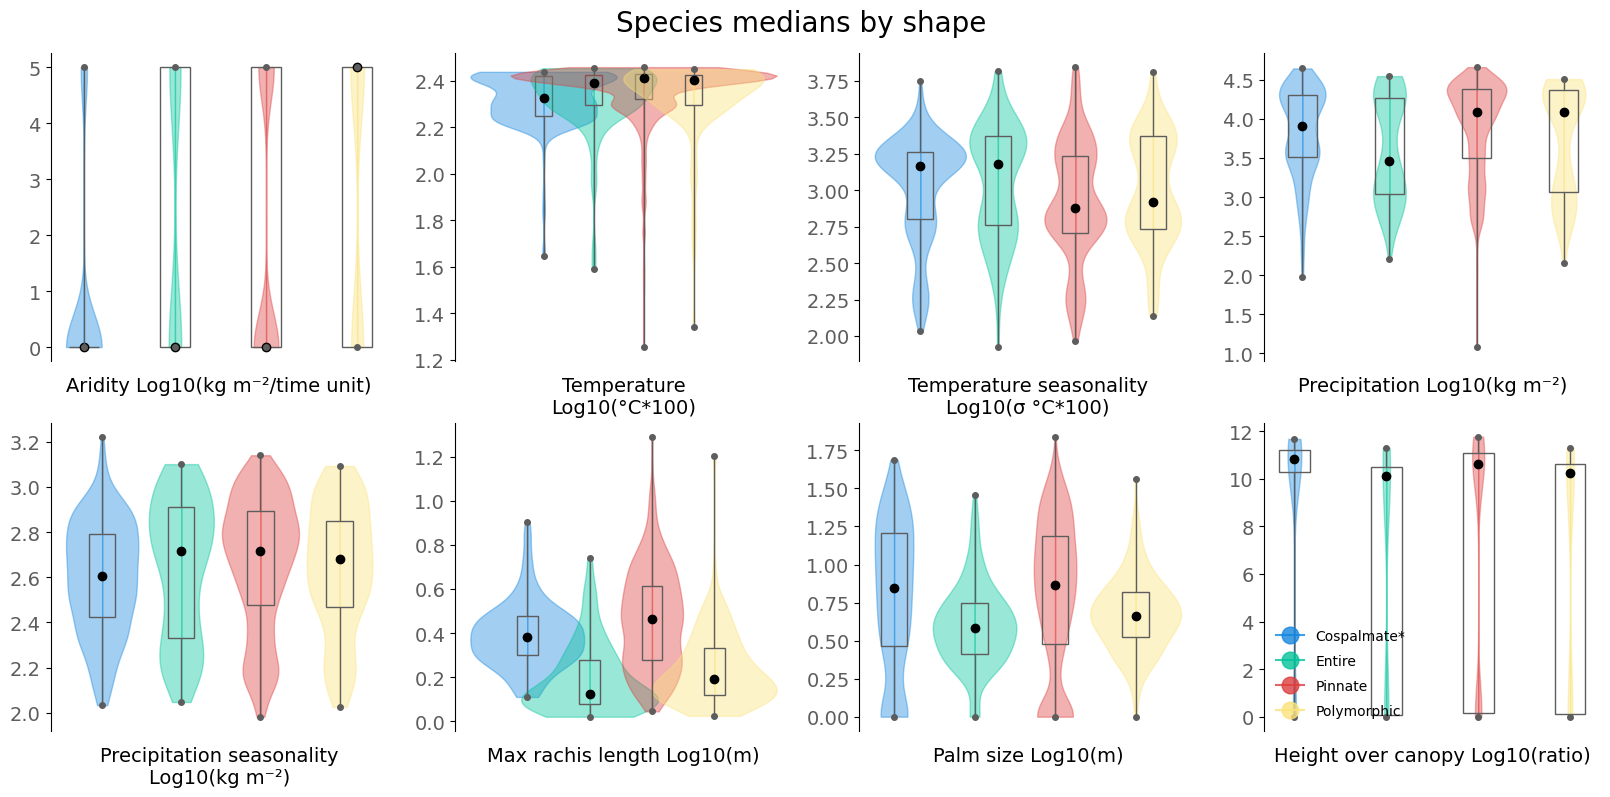

In [16]:
cols=4
rows=2

fig=plt.figure(figsize=(10*(rows),2.2*(cols)),facecolor='w')
fig.suptitle('Species medians by shape', size=20,y=0.93,fontname='arial')
outer_grid=gridspec.GridSpec(rows,cols, wspace=0.2, hspace=0.2) # nrows, ncols
outer_grid.tight_layout(fig,rect=[0, 0.04, 1, 0.96]) #rect=[0, 0.03, 1, 0.95]

shape_colour_dict={'cospalmate':"#1586DE", #light blue
'entire':'#02c39a', # now greensih, old: "#003480", # dark blue
'pinnate':"#dd3d3d",
'variable':"#fbe279"}

width=1
linewidth=1
alpha=0.4
boxcolor='#5e5d5d'

for xx in range(0,4,1):
    ax=plt.subplot(outer_grid[0,xx])
    x=0
    for shape in shape_colour_dict.keys():
        temp=intree[intree['shape']==shape][[variables[xx],'shape','species']]
        kde_plot(x,temp[variables[xx]],alpha=alpha,edgecolor=shape_colour_dict[shape],
                 facecolor=shape_colour_dict[shape],linewidth=linewidth,ax=ax)
        # boxes
        boxes(x,temp[variables[xx]],ax=ax,color='#5e5d5d')
        [ax.spines[loc].set_visible(False) for loc in ['top','right','bottom']];ax.set_xticklabels([])
        ax.tick_params(axis='x', which='both',top=False,bottom=False,right=False) # bottom=False,labelbottom=False
        plt.yticks(fontsize=14, color=boxcolor)
        plt.xlabel(variable_dict[variables[xx]],fontsize=14)
        x+=3
        
for xx in range(4,8,1):
    ax=plt.subplot(outer_grid[1,xx-4])
    x=0
    for shape in shape_colour_dict.keys():
        temp=intree[intree['shape']==shape][[variables[xx],'shape','species']]
        kde_plot(x,temp[variables[xx]],alpha=alpha,edgecolor=shape_colour_dict[shape],
                 facecolor=shape_colour_dict[shape],linewidth=linewidth,ax=ax)
        # boxes
        boxes(x,temp[variables[xx]],ax=ax,color='#5e5d5d')
        [ax.spines[loc].set_visible(False) for loc in ['top','right','bottom']];ax.set_xticklabels([])
        ax.tick_params(axis='x', which='both',top=False,bottom=False,right=False) # bottom=False,labelbottom=False
        plt.yticks(fontsize=14, color=boxcolor)
        plt.xlabel(variable_dict[variables[xx]],fontsize=14)
        x+=3
    if xx == 7:
        legend_elements=[]
        for key,value in shape_colour_dict.items():
            legend_elements.append(Line2D([0],[0],marker='o',color=value,label=shape_text_dict[key],markersize=12,alpha=0.8))
        ax.legend(handles=legend_elements, loc=3,labelspacing=0.8,frameon=False)
    ax.plot()
# plt.savefig('../figures/Fig_boxplots_20220908.pdf',dpi=300)
plt.show()

In [17]:
intree.groupby(by='shape')[variables].median().apply(lambda x: 10**x).reset_index()

,shape,CHELSA_ai,CHELSA_bio1,CHELSA_bio4,CHELSA_bio12,CHELSA_bio15,Max_Rachis_Length_m,StemHeightBladeLength,HeightOverCanopy
0,cospalmate,1.000000,211.5,1474.000000,8227.0000,405.000000,2.400000,7.000000,7.000000e+10
1,entire,1.000000,246.5,1514.000000,2940.0000,521.000000,1.329962,3.819987,1.350000e+10
2,pinnate,1.000000,257.0,750.491839,12194.9836,518.499759,2.900000,7.389993,4.064997e+10
3,variable,100000.025091,252.5,836.000000,12243.0000,481.500000,1.550000,4.614997,1.750000e+10


In [18]:
intree.groupby(by='shape')[variables].max().apply(lambda x: 10**x).reset_index()

,shape,CHELSA_ai,CHELSA_bio1,CHELSA_bio4,CHELSA_bio12,CHELSA_bio15,Max_Rachis_Length_m,StemHeightBladeLength,HeightOverCanopy
0,cospalmate,100003.433253,274.5,5608.5,44539.0,1670.0,8.0,48.75,4.710000e+11
1,entire,100002.855431,284.5,6536.5,35492.0,1263.0,5.5,28.80,2.000000e+11
2,pinnate,100003.976216,287.5,6973.0,46257.0,1382.5,19.5,69.12,5.820000e+11
3,variable,100002.408126,281.5,6484.0,32427.0,1240.0,16.0,36.40,1.934000e+11


In [19]:
intree.groupby(by='shape')[variables].min().apply(lambda x: 10**x).reset_index()

,shape,CHELSA_ai,CHELSA_bio1,CHELSA_bio4,CHELSA_bio12,CHELSA_bio15,Max_Rachis_Length_m,StemHeightBladeLength,HeightOverCanopy
0,cospalmate,1.0,44.5,109.0,96.0,108.0,1.29,1.0,1.0
1,entire,1.0,39.0,84.0,161.0,111.5,1.05,1.0,1.0
2,pinnate,1.0,18.0,92.0,12.0,96.0,1.11,1.0,1.0
3,variable,1.0,22.0,136.5,145.0,106.0,1.06,1.0,1.0


In [20]:
np.log10(70)

1.845098040014257

In [21]:
10**1.845098040014257

70.00000000000001

In [22]:
summarymedian=intree.groupby(by='shape')[variables].median().apply(lambda x: 10**x).copy(deep=True)
summarymedian.loc['pinnate','CHELSA_ai']

1.0

In [24]:
for shape in intree['shape'].dropna().unique():
    print(shape)

pinnate
entire
variable
cospalmate


In [25]:
summarymedian=intree.groupby(by='shape')[variables].median().apply(lambda x: 10**x).copy(deep=True)
summarymin=intree.groupby(by='shape')[variables].min().apply(lambda x: 10**x).copy(deep=True)
summarymax=intree.groupby(by='shape')[variables].max().apply(lambda x: 10**x).copy(deep=True)

summarydata=summarymedian.copy(deep=True)

for shape in intree['shape'].dropna().unique():
    for var in ['CHELSA_ai','CHELSA_bio1','CHELSA_bio4','CHELSA_bio12','CHELSA_bio15',
               'Max_Rachis_Length_m','StemHeightBladeLength','HeightOverCanopy']:
        median=summarymedian.loc[shape,var]
        minval=summarymin.loc[shape,var]
        maxval=summarymax.loc[shape,var]
        rangeval=maxval-minval
        summarydata.loc[shape,var]=u'%.2f (%.2f - %.2f) \u0394 %.2f'%(median,minval,maxval,rangeval)
# summarydata.to_csv('../data_files/variable_summary-by_shape_20220822.csv',sep='\t')

In [100]:
summarymedian=intree.groupby(by='shape')[variables].median().apply(lambda x: 10**x).copy(deep=True)
summarymin=intree.groupby(by='shape')[variables].min().apply(lambda x: 10**x).copy(deep=True)
summarymax=intree.groupby(by='shape')[variables].max().apply(lambda x: 10**x).copy(deep=True)

summarydata=summarymedian.copy(deep=True)

for shape in intree['shape'].dropna().unique():
    for var in ['CHELSA_ai','CHELSA_bio1','CHELSA_bio4','CHELSA_bio12','CHELSA_bio15',
               'Max_Rachis_Length_m','StemHeightBladeLength','HeightOverCanopy']:
        median='{:.2e}'.format(summarymedian.loc[shape,var])
        minval='{:.2e}'.format(summarymin.loc[shape,var])
        maxval='{:.2e}'.format(summarymax.loc[shape,var])
        rangeval='{:.2e}'.format(summarymax.loc[shape,var]-summarymin.loc[shape,var])
        summarydata.loc[shape,var]=u'%s (%s - %s) \u0394 %s'%(median,minval,maxval,rangeval)
    summarydata.loc[shape,'count']=len(intree[intree['shape']==shape])
    summarydata.loc[shape,'percent']='%.2f'%((len(intree[intree['shape']==shape])*100)/2057)
# summarydata.to_csv('../data_files/variable_summary-by_shape_cientificnotation_20220822.csv',sep='\t')
summarydata

,CHELSA_ai,CHELSA_bio1,CHELSA_bio4,CHELSA_bio12,CHELSA_bio15,Max_Rachis_Length_m,StemHeightBladeLength,HeightOverCanopy,count,percent
shape,,,,,,,,,,
cospalmate,1.00e+00 (1.00e+00 - 1.00e+05) Δ 1.00e+05,2.11e+02 (4.45e+01 - 2.74e+02) Δ 2.30e+02,1.47e+03 (1.09e+02 - 5.61e+03) Δ 5.50e+03,8.23e+03 (9.60e+01 - 4.45e+04) Δ 4.44e+04,4.05e+02 (1.08e+02 - 1.67e+03) Δ 1.56e+03,2.40e+00 (1.29e+00 - 8.00e+00) Δ 6.71e+00,7.00e+00 (1.00e+00 - 4.87e+01) Δ 4.77e+01,7.00e+10 (1.00e+00 - 4.71e+11) Δ 4.71e+11,440.0,21.39
entire,1.00e+00 (1.00e+00 - 1.00e+05) Δ 1.00e+05,2.47e+02 (3.90e+01 - 2.85e+02) Δ 2.46e+02,1.51e+03 (8.40e+01 - 6.54e+03) Δ 6.45e+03,2.94e+03 (1.61e+02 - 3.55e+04) Δ 3.53e+04,5.21e+02 (1.11e+02 - 1.26e+03) Δ 1.15e+03,1.33e+00 (1.05e+00 - 5.50e+00) Δ 4.45e+00,3.82e+00 (1.00e+00 - 2.88e+01) Δ 2.78e+01,1.35e+10 (1.00e+00 - 2.00e+11) Δ 2.00e+11,106.0,5.15
pinnate,1.00e+00 (1.00e+00 - 1.00e+05) Δ 1.00e+05,2.57e+02 (1.80e+01 - 2.88e+02) Δ 2.70e+02,7.50e+02 (9.20e+01 - 6.97e+03) Δ 6.88e+03,1.22e+04 (1.20e+01 - 4.63e+04) Δ 4.62e+04,5.18e+02 (9.60e+01 - 1.38e+03) Δ 1.29e+03,2.90e+00 (1.11e+00 - 1.95e+01) Δ 1.84e+01,7.39e+00 (1.00e+00 - 6.91e+01) Δ 6.81e+01,4.06e+10 (1.00e+00 - 5.82e+11) Δ 5.82e+11,1370.0,66.60
variable,1.00e+05 (1.00e+00 - 1.00e+05) Δ 1.00e+05,2.52e+02 (2.20e+01 - 2.81e+02) Δ 2.59e+02,8.36e+02 (1.36e+02 - 6.48e+03) Δ 6.35e+03,1.22e+04 (1.45e+02 - 3.24e+04) Δ 3.23e+04,4.81e+02 (1.06e+02 - 1.24e+03) Δ 1.13e+03,1.55e+00 (1.06e+00 - 1.60e+01) Δ 1.49e+01,4.61e+00 (1.00e+00 - 3.64e+01) Δ 3.54e+01,1.75e+10 (1.00e+00 - 1.93e+11) Δ 1.93e+11,140.0,6.81


# Comparing petiole, blade, and rachis length

findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.


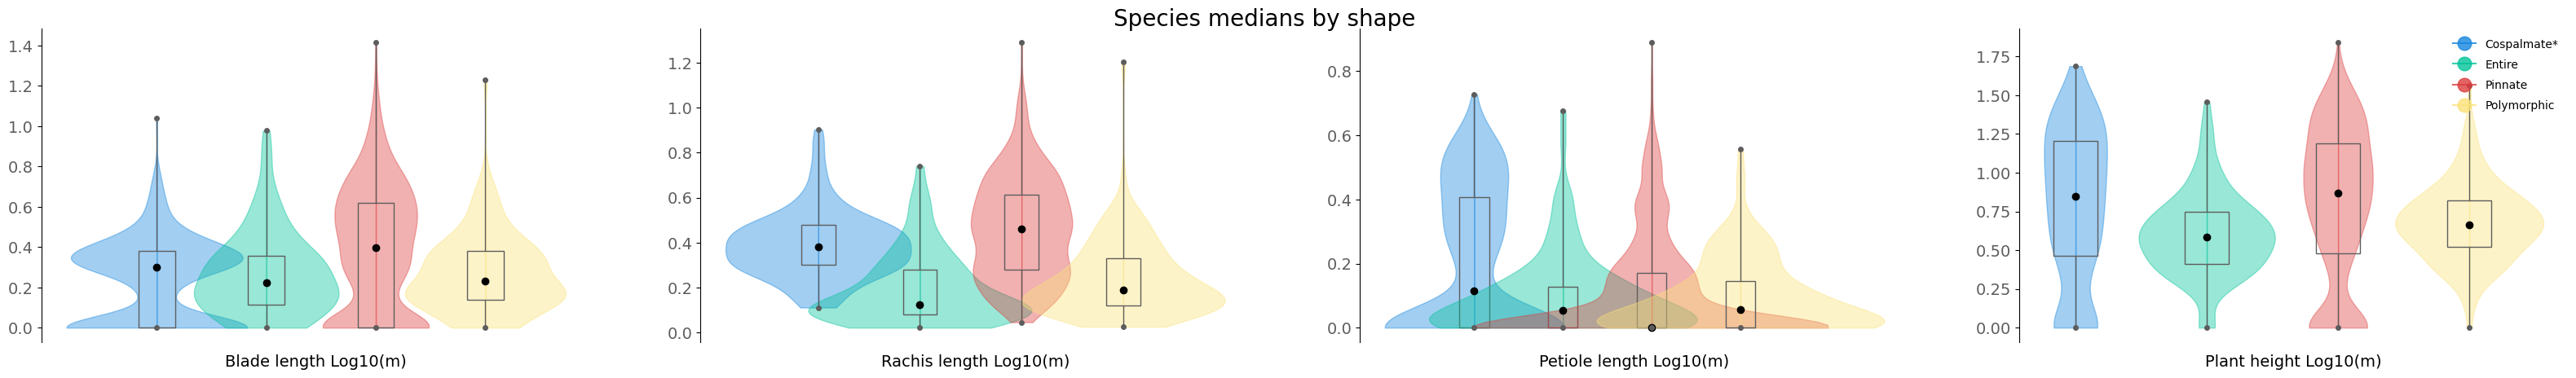

In [27]:
cols=4
rows=1

fig=plt.figure(figsize=(10*(cols),5*(rows)),facecolor='w')
fig.suptitle('Species medians by shape', size=20,y=0.93,fontname='arial')
outer_grid=gridspec.GridSpec(rows,cols, wspace=0.2, hspace=0.2) # nrows, ncols
outer_grid.tight_layout(fig,rect=[0, 0.04, 1, 0.96]) #rect=[0, 0.03, 1, 0.95]

shape_colour_dict={'cospalmate':"#1586DE", #light blue
'entire':'#02c39a', # now greensih, old: "#003480", # dark blue
'pinnate':"#dd3d3d",
'variable':"#fbe279"}

variables=['Max_Blade_Length_m','Max_Rachis_Length_m','Max_Petiole_length_m','StemHeightBladeLength']

variable_dict={'Max_Blade_Length_m':'Blade length Log10(m)',
               'Max_Rachis_Length_m':'Rachis length Log10(m)',
               'Max_Petiole_length_m':'Petiole length Log10(m)',
               'StemHeightBladeLength':'Plant height Log10(m)'}


width=1
linewidth=1
alpha=0.4
boxcolor='#5e5d5d'

for xx in range(0,4,1):
    ax=plt.subplot(outer_grid[0,xx])
    x=0
    for shape in shape_colour_dict.keys():
        temp=intree[intree['shape']==shape][[variables[xx],'shape','species']]
        kde_plot(x,temp[variables[xx]],alpha=alpha,edgecolor=shape_colour_dict[shape],
                 facecolor=shape_colour_dict[shape],linewidth=linewidth,ax=ax)
        # boxes
        boxes(x,temp[variables[xx]],ax=ax,color='#5e5d5d')
        [ax.spines[loc].set_visible(False) for loc in ['top','right','bottom']];ax.set_xticklabels([])
        ax.tick_params(axis='x', which='both',top=False,bottom=False,right=False) # bottom=False,labelbottom=False
        plt.yticks(fontsize=14, color=boxcolor)
        plt.xlabel(variable_dict[variables[xx]],fontsize=14)
        x+=3
        
    if xx == 3:
        legend_elements=[]
        for key,value in shape_colour_dict.items():
            legend_elements.append(Line2D([0],[0],marker='o',color=value,label=shape_text_dict[key],markersize=12,alpha=0.8))
        ax.legend(handles=legend_elements, loc='best',labelspacing=0.8,frameon=False)
    
    ax.plot()
# plt.savefig('../figures/Fig_boxplots_20220908.pdf',dpi=300)
plt.show()

### Check for correlations

findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.


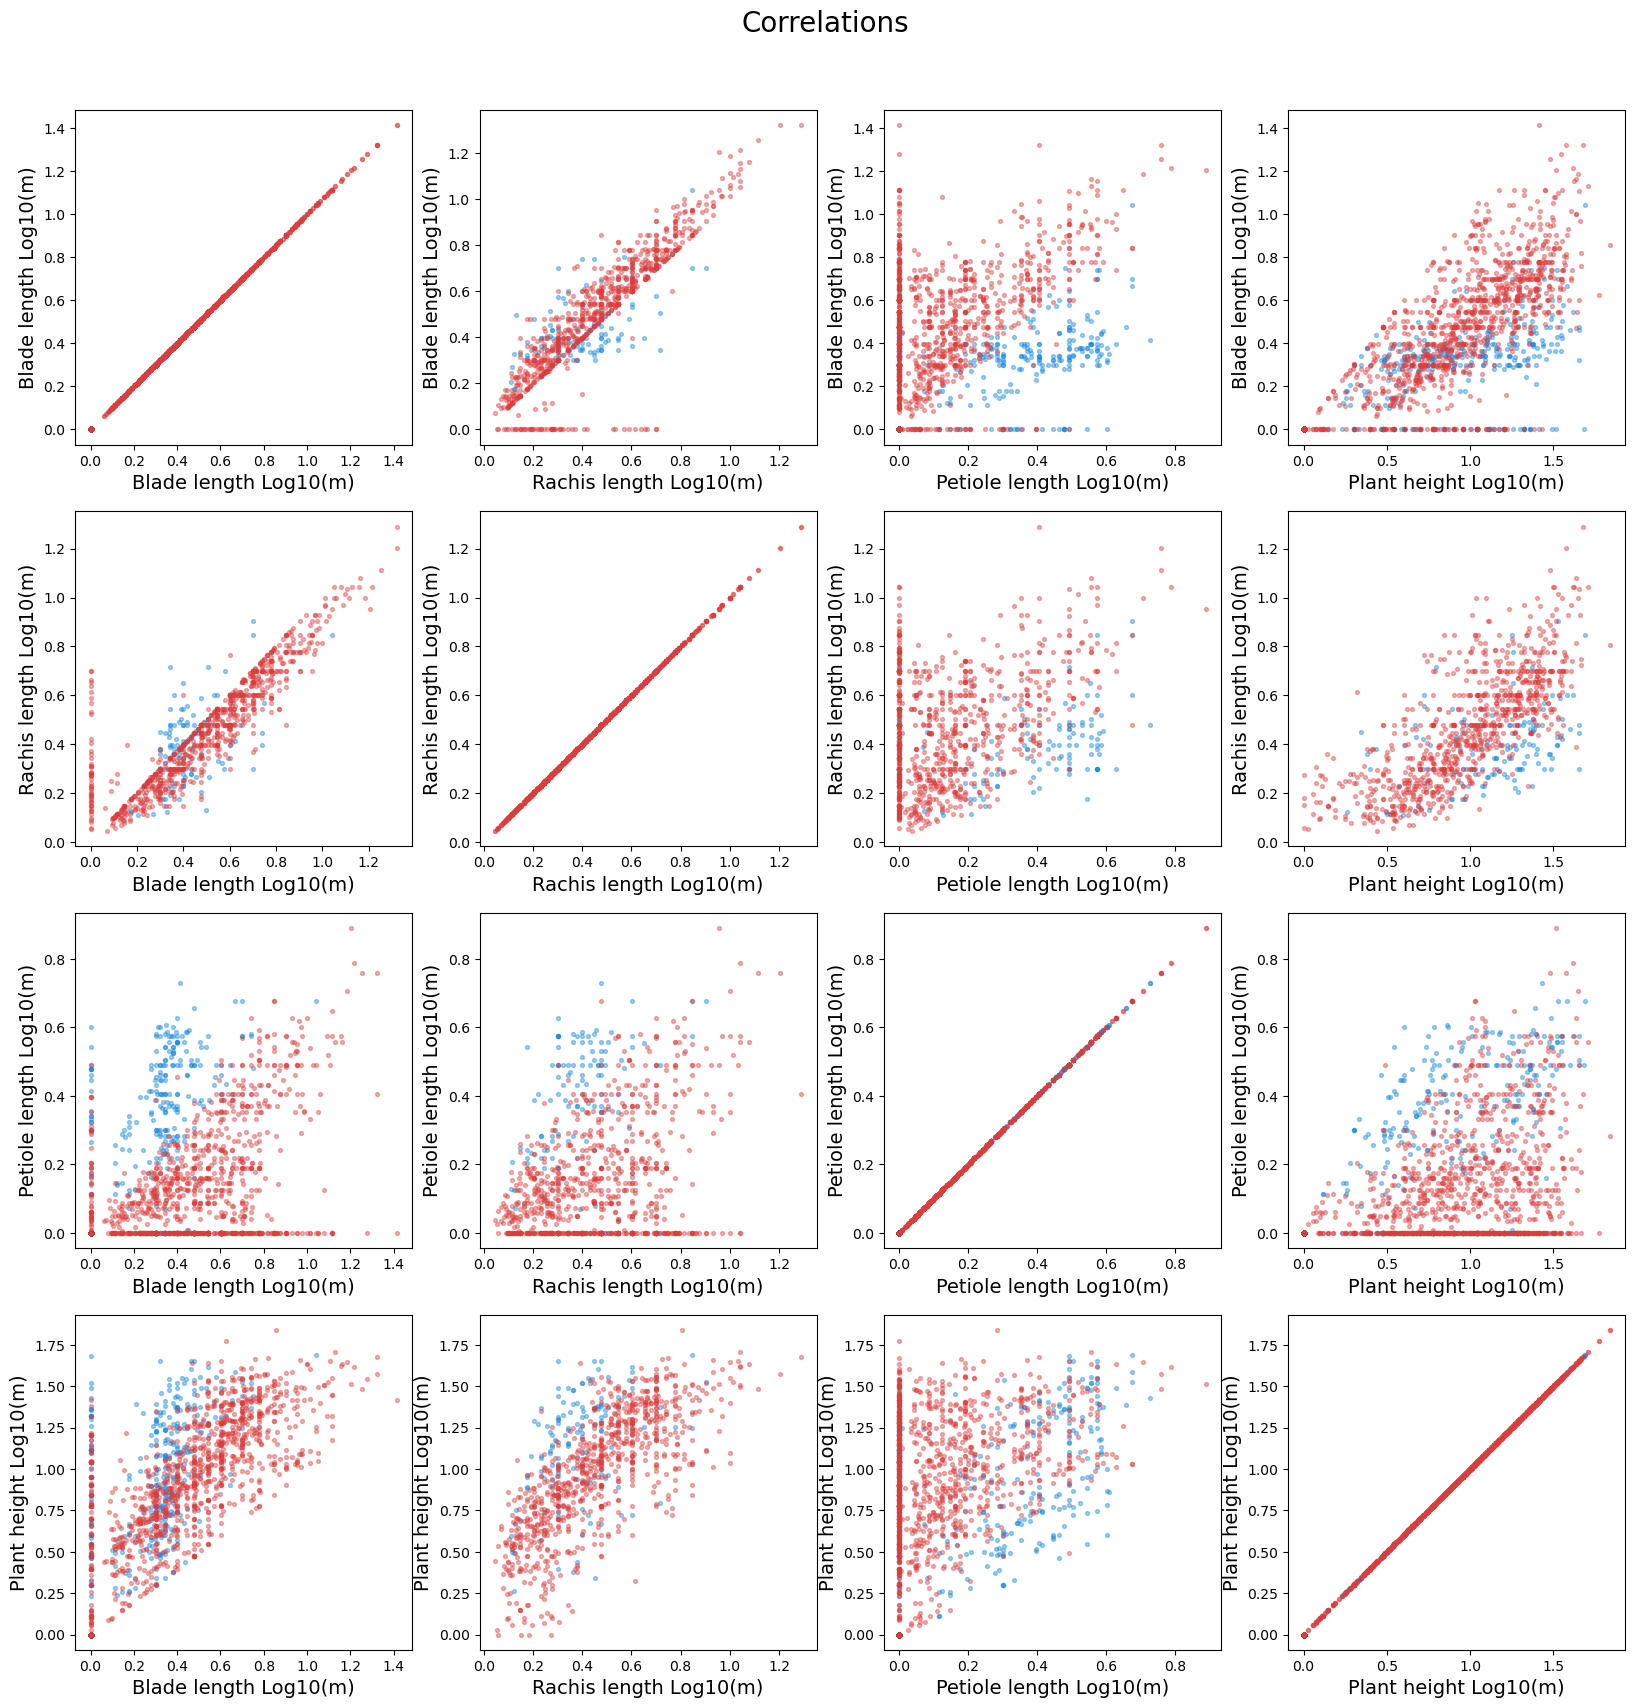

In [28]:
from itertools import product

cols=4
rows=4

fig=plt.figure(figsize=(5*(cols),5*(rows)),facecolor='w')
fig.suptitle('Correlations', size=20,y=0.93,fontname='arial')
outer_grid=gridspec.GridSpec(rows,cols, wspace=0.2, hspace=0.2) # nrows, ncols

num =range(len(variables))

for index,(x,y) in enumerate(product(num,num)):
#     print(index,x,y)
    ax=plt.subplot(outer_grid[y,x])
    
#     for shape in shape_colour_dict.keys():
    for shape in ['cospalmate','pinnate']:
        temp=intree[intree['shape']==shape][[variables[x],variables[y]]].dropna()
        ax.scatter(temp[variables[x]],temp[variables[y]],c=shape_colour_dict[shape],
                  s=8, alpha=0.4)
        plt.xlabel(variable_dict[variables[x]],fontsize=14)
        plt.ylabel(variable_dict[variables[y]],fontsize=14)
    
plt.show()

# Stats by dissected vs. entire

**Dissected:** palmate + costapalmate + pinnate

**Entire:** palmate-entire + pinnate-entire

In [35]:
asemusse_leafShape=pd.read_csv('../data_files/palm_leaf_shape_MFT_20221201.csv',sep='\t')
asemusse_leafShape.columns

Index(['species', 'subfamily', 'plication_all', 'shape_all', 'polymorphism',
       'dissection', 'pinnate', 'shape_gp', 'shape_gp_num', 'induplicate',
       'ind_variable', 'ind_cospalmate', 'ind_pinnate', 'ind_entire',
       'ind_bipinnate', 'reduplicate', 'red_variable', 'red_variance',
       'red_cospalmate', 'red_pinnate', 'red_entire'],
      dtype='object')

In [36]:
list(intree.columns)
intree[['species','species_name']].isna().describe()
intree[intree['species_name'].isna()][['species','species_name']]

,species,species_name
1019,Lanonia_batoensis,NaN
1027,Lanonia_manglaensis,NaN


In [37]:
# print([x if str(x) not in palms_all_variables['species'].values else '' for x in asemusse_leafShape['species'].values])
innusse_notpalms=[]
[innusse_notpalms.append(x) if str(x) not in intree['species'].values and 'Calamus' not in str(x) else '' for x in intree['species'].values]

# the rest of the palms here are also climbing, so we don't need them anyways
innusse_notpalms

[]

In [38]:
# good, just checking
print(intree[intree['species'].str.contains('Joha')][['species','shape']])
print(asemusse_leafShape[asemusse_leafShape['species'].str.contains('Joha')][['species','dissection','pinnate','shape_gp']])

                             species   shape
1003   Johannesteijsmannia_altifrons  entire
1004  Johannesteijsmannia_lanceolata  entire
1005   Johannesteijsmannia_magnifica  entire
1006  Johannesteijsmannia_perakensis  entire
                            species  dissection  pinnate       shape_gp
454   Johannesteijsmannia_altifrons           0        0  palmateentire
455  Johannesteijsmannia_lanceolata           0        0  palmateentire
456   Johannesteijsmannia_magnifica           0        0  palmateentire
457  Johannesteijsmannia_perakensis           0        0  palmateentire


In [69]:
intreebckp=intree.copy(deep=True)
intreebckp.reset_index(inplace=True)
intreebckp.drop(columns=['index'], inplace=True)
intreebckp

,level_0,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,species,coordinateUncertaintyInMeters,decimalLatitude,decimalLongitude,gbifID,individualCount,...,Simard_Pinto_3DGlobalVeg_JGR_stand,MaxStemHeight_m_stand,MaxStemDia_cm_stand,MaxLeafNumber_stand,Max_Blade_Length_m_stand,Max_Rachis_Length_m_stand,Max_Petiole_length_m_stand,StemHeightBladeLength_stand,HeightOverCanopy_stand,UnderstoreyCanopy_num
0,0,0,0,0,Acrocomia_aculeata,80.0,8.555854,-75.696278,2.423127e+09,1.0,...,-0.536819,1.036626,1.608076,1.650127,1.106316,0.548975,-0.696866,0.975771,0.755518,1.0
1,1,1,1,1,Acrocomia_crispa,514.5,21.616574,-77.756928,1.929436e+09,NaN,...,-0.536819,1.375545,1.289018,0.374731,0.931468,NaN,0.575899,1.254846,0.784294,1.0
2,2,2,2,2,Acrocomia_emensis,NaN,-20.775000,-47.308334,2.452918e+09,4.0,...,-0.536819,-1.254110,NaN,NaN,-1.126470,NaN,-0.696866,-1.493765,-1.463366,0.0
3,3,3,3,3,Acrocomia_glaucescens,NaN,-16.655692,-54.684167,1.261911e+09,NaN,...,-0.536819,-1.254110,NaN,NaN,-1.126470,NaN,-0.696866,-1.493765,-1.463366,NaN
4,4,4,4,4,Acrocomia_hassleri,850.0,-23.809420,-55.733195,1.258407e+09,4.0,...,-0.536819,-1.254110,NaN,-1.219380,-0.173645,-1.003313,0.350548,-0.718884,0.549080,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2052,2190,2190,2715,2715,Verschaffeltia_splendida,NaN,NaN,NaN,NaN,NaN,...,NaN,1.655670,1.152043,-0.734762,0.855324,NaN,-0.696866,1.466457,NaN,1.0
2053,2191,2191,2716,2716,Wallaceodoxa_raja-ampat,NaN,NaN,NaN,NaN,NaN,...,NaN,-1.254110,NaN,NaN,-1.126470,NaN,-0.696866,-1.493765,NaN,NaN
2054,2192,2192,2717,2717,Wallichia_marianneae,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.400750,0.202956,-1.219380,0.855324,-0.244873,1.682299,0.214112,NaN,0.0
2055,2193,2193,2718,2718,Wallichia_triandra,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.016021,-0.352280,NaN,0.733242,0.548975,-0.696866,0.155143,NaN,0.0


In [70]:
# add the 'shape_gp' column to the data
# that classificattion acounts for entire states being derived from either pinnate or palmate
intreebckp['shape_gp']=''
intreebckp['disVent']=''
intreebckp['pinVpal']=''

for index,row in enumerate(intreebckp.itertuples()):
    if row.species in asemusse_leafShape['species'].values:
#         print(index,row.species,asemusse_leafShape[asemusse_leafShape['species']==row.species]['shape_gp'].values[0])
        intreebckp.loc[index,'shape_gp']=asemusse_leafShape[asemusse_leafShape['species']==row.species]['shape_gp'].values[0]
        intreebckp.loc[index,'disVent']=asemusse_leafShape[asemusse_leafShape['species']==row.species]['dissection'].values[0]
        intreebckp.loc[index,'pinVpal']=asemusse_leafShape[asemusse_leafShape['species']==row.species]['pinnate'].values[0]
    else:
        intreebckp.loc[index,'shape_gp']=np.nan
        intreebckp.loc[index,'disVent']=np.nan
        intreebckp.loc[index,'pinVpal']=np.nan
        
print(intreebckp[intreebckp['species'].str.contains('Joha')][['species','shape']])
intreebckp[['species','shape','shape_gp','dissect', 'cospalmate_binomial','pinnate_binomial', 'entire_binomial']]

                            species   shape
979   Johannesteijsmannia_altifrons  entire
980  Johannesteijsmannia_lanceolata  entire
981   Johannesteijsmannia_magnifica  entire
982  Johannesteijsmannia_perakensis  entire


,species,shape,shape_gp,dissect,cospalmate_binomial,pinnate_binomial,entire_binomial
0,Acrocomia_aculeata,pinnate,pinnate,dissected,False,True,False
1,Acrocomia_crispa,pinnate,pinnate,dissected,False,True,False
2,Acrocomia_emensis,pinnate,pinnate,dissected,False,True,False
3,Acrocomia_glaucescens,pinnate,pinnate,dissected,False,True,False
4,Acrocomia_hassleri,pinnate,pinnate,dissected,False,True,False
...,...,...,...,...,...,...,...
2052,Verschaffeltia_splendida,entire,pinnateentire,entire,False,False,True
2053,Wallaceodoxa_raja-ampat,pinnate,pinnate,dissected,False,True,False
2054,Wallichia_marianneae,pinnate,pinnate,dissected,False,True,False
2055,Wallichia_triandra,pinnate,pinnate,dissected,False,True,False


### Now, the stats

In [72]:
intreebckp[['shape_gp','disVent','pinVpal']].isna().describe()

,shape_gp,disVent,pinVpal
count,2057,2057,2057
unique,2,2,2
top,False,False,False
freq,2055,2055,2055


In [54]:
intreebckp[intreebckp['shape_gp'].isna()]

,level_0,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,species,coordinateUncertaintyInMeters,decimalLatitude,decimalLongitude,gbifID,individualCount,...,MaxStemHeight_m_stand,MaxStemDia_cm_stand,MaxLeafNumber_stand,Max_Blade_Length_m_stand,Max_Rachis_Length_m_stand,Max_Petiole_length_m_stand,StemHeightBladeLength_stand,HeightOverCanopy_stand,UnderstoreyCanopy_num,shape_gp
995,1019,1019,1315,1315,Lanonia_batoensis,NaN,14.731667,108.881665,2.696018e+09,1.0,...,-1.254110,NaN,NaN,-1.12647,NaN,-0.696866,-1.493765,-1.463366,NaN,NaN
1002,1027,1027,1323,1323,Lanonia_manglaensis,NaN,14.663050,108.406782,1.929749e+09,1.0,...,-0.635065,NaN,NaN,-1.12647,NaN,-0.696866,-0.883158,0.519492,0.0,NaN


In [73]:
print(intreebckp['shape_gp'].dropna().unique())
print(intreebckp['disVent'].dropna().unique())
print(intreebckp['pinVpal'].dropna().unique())

['pinnate' 'pinnateentire' 'pinnatepolymorphic' 'palmate' 'palmateentire']
[1 0]
[1 0]


In [59]:
summarymedian

,Max_Blade_Length_m,Max_Rachis_Length_m,Max_Petiole_length_m,StemHeightBladeLength
shape_gp,,,,
palmate,2.0,2.40,1.30,7.00
palmateentire,2.2,3.40,1.95,5.00
pinnate,2.5,2.90,1.00,7.50
pinnateentire,1.6,1.32,1.12,3.73
pinnatepolymorphic,1.7,1.55,1.14,4.61


In [62]:
intreebckp['shape_gp'].describe()
intreebckp[['CHELSA_ai','CHELSA_bio1','CHELSA_bio4','CHELSA_bio12','CHELSA_bio15',
               'Max_Rachis_Length_m','StemHeightBladeLength','HeightOverCanopy']].dtypes

CHELSA_ai                float64
CHELSA_bio1              float64
CHELSA_bio4              float64
CHELSA_bio12             float64
CHELSA_bio15             float64
Max_Rachis_Length_m      float64
StemHeightBladeLength    float64
HeightOverCanopy         float64
dtype: object

In [63]:
variables=['CHELSA_ai','CHELSA_bio1','CHELSA_bio4','CHELSA_bio12','CHELSA_bio15',
               'Max_Rachis_Length_m','StemHeightBladeLength','HeightOverCanopy']

In [68]:
# asemusse_leafShape.groupby
summarymedian=intreebckp.groupby(by='shape_gp', dropna=True)[variables].median().apply(lambda x: 10**x).copy(deep=True)
summarymin=intreebckp.groupby(by='shape_gp', dropna=True)[variables].min().apply(lambda x: 10**x).copy(deep=True)
summarymax=intreebckp.groupby(by='shape_gp', dropna=True)[variables].max().apply(lambda x: 10**x).copy(deep=True)

summarydata=summarymedian.copy(deep=True)
summarydata['count']=''
summarydata['percent']=''
for shape in intreebckp['shape_gp'].dropna().unique():
    for var in ['CHELSA_ai','CHELSA_bio1','CHELSA_bio4','CHELSA_bio12','CHELSA_bio15',
               'Max_Rachis_Length_m','StemHeightBladeLength','HeightOverCanopy']:
        median='{:.2e}'.format(summarymedian.loc[shape,var])
        minval='{:.2e}'.format(summarymin.loc[shape,var])
        maxval='{:.2e}'.format(summarymax.loc[shape,var])
        rangeval='{:.2e}'.format(summarymax.loc[shape,var]-summarymin.loc[shape,var])
        summarydata.loc[shape,var]=u'%s (%s - %s) \u0394 %s'%(median,minval,maxval,rangeval)
    # total samples in tree and with data: 2057
    summarydata.loc[shape,'count']=len(intreebckp[intreebckp['shape_gp']==shape])
    summarydata.loc[shape,'percent']='%.2f'%((len(intreebckp[intreebckp['shape_gp']==shape])*100)/2057)
    
summarydata.to_csv('../data_files/variable_summary-by_shapegp_cientificnotation_20230109.csv',sep='\t')
summarydata

,CHELSA_ai,CHELSA_bio1,CHELSA_bio4,CHELSA_bio12,CHELSA_bio15,Max_Rachis_Length_m,StemHeightBladeLength,HeightOverCanopy,count,percent
shape_gp,,,,,,,,,,
palmate,1.00e+00 (1.00e+00 - 1.00e+05) Δ 1.00e+05,2.11e+02 (4.45e+01 - 2.74e+02) Δ 2.30e+02,1.48e+03 (1.09e+02 - 5.61e+03) Δ 5.50e+03,8.32e+03 (9.60e+01 - 4.45e+04) Δ 4.44e+04,4.04e+02 (1.08e+02 - 1.67e+03) Δ 1.56e+03,2.40e+00 (1.29e+00 - 8.00e+00) Δ 6.71e+00,7.00e+00 (1.00e+00 - 4.87e+01) Δ 4.77e+01,7.17e+10 (1.00e+00 - 4.71e+11) Δ 4.71e+11,439,21.34
palmateentire,1.00e+00 (1.00e+00 - 1.00e+05) Δ 1.00e+05,2.65e+02 (2.47e+02 - 2.69e+02) Δ 2.30e+01,5.44e+02 (2.64e+02 - 6.90e+02) Δ 4.26e+02,1.97e+04 (1.79e+04 - 2.90e+04) Δ 1.11e+04,4.86e+02 (4.12e+02 - 5.07e+02) Δ 9.50e+01,3.40e+00 (3.40e+00 - 3.40e+00) Δ 0.00e+00,5.00e+00 (2.50e+00 - 6.12e+00) Δ 3.62e+00,2.22e+05 (1.06e+00 - 5.12e+10) Δ 5.12e+10,7,0.34
pinnate,1.00e+00 (1.00e+00 - 1.00e+05) Δ 1.00e+05,2.57e+02 (1.80e+01 - 2.88e+02) Δ 2.70e+02,7.44e+02 (9.20e+01 - 6.97e+03) Δ 6.88e+03,1.23e+04 (1.20e+01 - 4.63e+04) Δ 4.62e+04,5.18e+02 (9.60e+01 - 1.38e+03) Δ 1.29e+03,2.90e+00 (1.11e+00 - 1.95e+01) Δ 1.84e+01,7.50e+00 (1.00e+00 - 6.91e+01) Δ 6.81e+01,4.21e+10 (1.00e+00 - 5.82e+11) Δ 5.82e+11,1363,66.26
pinnateentire,1.00e+00 (1.00e+00 - 1.00e+05) Δ 1.00e+05,2.35e+02 (3.90e+01 - 2.85e+02) Δ 2.46e+02,1.76e+03 (8.40e+01 - 6.54e+03) Δ 6.45e+03,2.21e+03 (1.61e+02 - 3.55e+04) Δ 3.53e+04,5.59e+02 (1.11e+02 - 1.26e+03) Δ 1.15e+03,1.32e+00 (1.05e+00 - 5.50e+00) Δ 4.45e+00,3.73e+00 (1.00e+00 - 2.88e+01) Δ 2.78e+01,1.51e+10 (1.00e+00 - 2.00e+11) Δ 2.00e+11,105,5.10
pinnatepolymorphic,1.00e+05 (1.00e+00 - 1.00e+05) Δ 1.00e+05,2.52e+02 (2.20e+01 - 2.81e+02) Δ 2.59e+02,8.36e+02 (1.36e+02 - 6.48e+03) Δ 6.35e+03,1.22e+04 (1.45e+02 - 3.24e+04) Δ 3.23e+04,4.81e+02 (1.06e+02 - 1.24e+03) Δ 1.13e+03,1.55e+00 (1.06e+00 - 1.60e+01) Δ 1.49e+01,4.61e+00 (1.00e+00 - 3.64e+01) Δ 3.54e+01,1.75e+10 (1.00e+00 - 1.93e+11) Δ 1.93e+11,141,6.85


### plot KDEs, splitting 'entire' into pinnate-entire and palmate-entire

In [76]:
intreebckp['shape_gp'].dropna().unique()

array(['pinnate', 'pinnateentire', 'pinnatepolymorphic', 'palmate',
       'palmateentire'], dtype=object)

palmateentire Max_Rachis_Length_m 7 nan


findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.


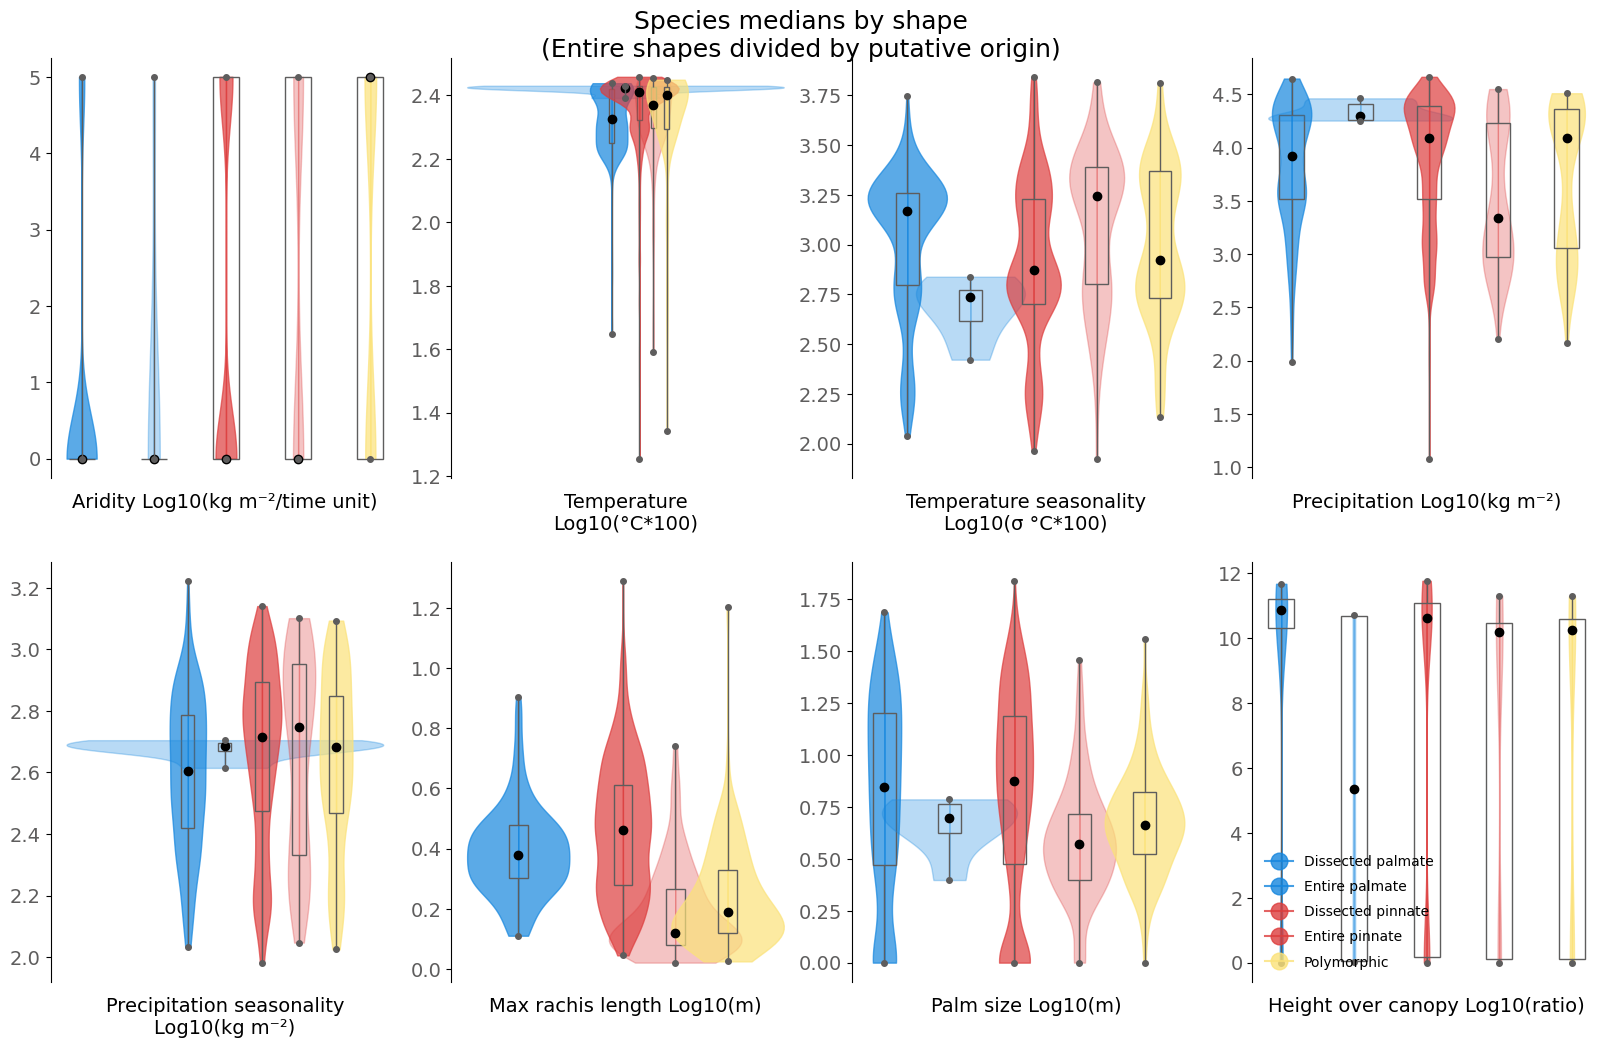

In [92]:
cols=4
rows=2

fig=plt.figure(figsize=(10*(rows),3*(cols)),facecolor='w')
fig.suptitle('Species medians by shape\n(Entire shapes divided by putative origin)', size=18,y=0.92,fontname='arial')
outer_grid=gridspec.GridSpec(rows,cols, wspace=0.15, hspace=0.2) # nrows, ncols
outer_grid.tight_layout(fig,rect=[0, 0.04, 1, 0.96]) #rect=[0, 0.03, 1, 0.95]

# shape_colour_dict={'cospalmate':"#1586DE", #light blue
# 'entire':'#02c39a', # now greensih, old: "#003480", # dark blue
# 'pinnate':"#dd3d3d",
# 'variable':"#fbe279"}

shape_colour_dict={'palmate':"#1586DE",
                    'palmateentire':"#1586DE", 
                    'pinnate':"#dd3d3d",
                   'pinnateentire':'#dd3d3d',
                    'pinnatepolymorphic':"#fbe279"}

shape_text_dict={'palmate':'Dissected palmate',
                   'palmateentire':'Entire palmate',
                    'pinnateentire':'Entire pinnate',
                    'pinnate':'Dissected pinnate',
                    'pinnatepolymorphic':'Polymorphic'}

variables=['CHELSA_ai','CHELSA_bio1','CHELSA_bio4','CHELSA_bio12','CHELSA_bio15',
           'Max_Rachis_Length_m','StemHeightBladeLength','HeightOverCanopy']

variable_dict={'CHELSA_ai':'Aridity Log10(kg m\u207B\u00b2/time unit)',
               'CHELSA_bio1':'Temperature\nLog10(\u00B0C*100)',
               'CHELSA_bio4':'Temperature seasonality\nLog10(\u03C3 \u00B0C*100)',
               'CHELSA_bio12':u'Precipitation Log10(kg m\u207B\u00b2)',
               'CHELSA_bio15':u'Precipitation seasonality\nLog10(kg m\u207B\u00b2)',
               'Max_Rachis_Length_m':'Max rachis length Log10(m)',
               'StemHeightBladeLength': 'Palm size Log10(m)',
               'HeightOverCanopy':'Height over canopy Log10(ratio)'}


width=1
linewidth=1
boxcolor='#5e5d5d'
xplus=2.8

for xx in range(0,4,1):
    ax=plt.subplot(outer_grid[0,xx])
    x=0
    for shape in shape_colour_dict.keys():
        temp=intreebckp[intreebckp['shape_gp']==shape][[variables[xx],'shape','species']]
        try:
    #         print(temp[variables[xx]].isna().describe())
            kde_plot(x,temp[variables[xx]],alpha=0.7 if shape in ['palmate','pinnate','pinnatepolymorphic'] else 0.3,
                     edgecolor=shape_colour_dict[shape],
                     facecolor=shape_colour_dict[shape],linewidth=linewidth,ax=ax)
            # boxes
            boxes(x,temp[variables[xx]],ax=ax,color='#5e5d5d')
            [ax.spines[loc].set_visible(False) for loc in ['top','right','bottom']];ax.set_xticklabels([])
            ax.tick_params(axis='x', which='both',top=False,bottom=False,right=False) # bottom=False,labelbottom=False
            plt.yticks(fontsize=14, color=boxcolor)
            plt.xlabel(variable_dict[variables[xx]],fontsize=14)
        except:
            print(shape,variables[xx],len(temp[variables[xx]]),temp[variables[xx]].std())
        x+=xplus
        
for xx in range(4,8,1):
    ax=plt.subplot(outer_grid[1,xx-4])
    x=0
    for shape in shape_colour_dict.keys():
        temp=intreebckp[intreebckp['shape_gp']==shape][[variables[xx],'shape','species']]
        try:
#             print(temp[variables[xx]].isna().describe())
            kde_plot(x,temp[variables[xx]],alpha=0.7 if shape in ['palmate','pinnate','pinnatepolymorphic'] else 0.3,
                     edgecolor=shape_colour_dict[shape],
                     facecolor=shape_colour_dict[shape],linewidth=linewidth,ax=ax)
            # boxes
            boxes(x,temp[variables[xx]],ax=ax,color='#5e5d5d')
            [ax.spines[loc].set_visible(False) for loc in ['top','right','bottom']];ax.set_xticklabels([])
            ax.tick_params(axis='x', which='both',top=False,bottom=False,right=False) # bottom=False,labelbottom=False
            plt.yticks(fontsize=14, color=boxcolor)
            plt.xlabel(variable_dict[variables[xx]],fontsize=14)
        except:
            print(shape,variables[xx],len(temp[variables[xx]]),temp[variables[xx]].std())
        x+=xplus
    if xx == 7:
        legend_elements=[]
        for key,value in shape_colour_dict.items():
            legend_elements.append(Line2D([0],[0],marker='o',color=value,label=shape_text_dict[key],markersize=12,alpha=0.8))
        ax.legend(handles=legend_elements, loc=3,labelspacing=0.8,frameon=False)
    ax.plot()
# plt.savefig('../figures/Fig_boxplots_shapegp_20230110.pdf',dpi=300)
plt.show()

In [74]:
# map dissection: entire vs. dissected
summarymedian=intreebckp.groupby(by='disVent', dropna=True)[variables].median().apply(lambda x: 10**x).copy(deep=True)
summarymin=intreebckp.groupby(by='disVent', dropna=True)[variables].min().apply(lambda x: 10**x).copy(deep=True)
summarymax=intreebckp.groupby(by='disVent', dropna=True)[variables].max().apply(lambda x: 10**x).copy(deep=True)

summarydata=summarymedian.copy(deep=True)
summarydata['count']=''
summarydata['percent']=''
for shape in intreebckp['disVent'].dropna().unique():
    for var in ['CHELSA_ai','CHELSA_bio1','CHELSA_bio4','CHELSA_bio12','CHELSA_bio15',
               'Max_Rachis_Length_m','StemHeightBladeLength','HeightOverCanopy']:
        median='{:.2e}'.format(summarymedian.loc[shape,var])
        minval='{:.2e}'.format(summarymin.loc[shape,var])
        maxval='{:.2e}'.format(summarymax.loc[shape,var])
        rangeval='{:.2e}'.format(summarymax.loc[shape,var]-summarymin.loc[shape,var])
        summarydata.loc[shape,var]=u'%s (%s - %s) \u0394 %s'%(median,minval,maxval,rangeval)
    # total samples in tree and with data: 2057
    summarydata.loc[shape,'count']=len(intreebckp[intreebckp['disVent']==shape])
    summarydata.loc[shape,'percent']='%.2f'%((len(intreebckp[intreebckp['disVent']==shape])*100)/2057)
    
summarydata.to_csv('../data_files/variable_summary-by_disVent_cientificnotation_20230109.csv',sep='\t')
summarydata

,CHELSA_ai,CHELSA_bio1,CHELSA_bio4,CHELSA_bio12,CHELSA_bio15,Max_Rachis_Length_m,StemHeightBladeLength,HeightOverCanopy,count,percent
disVent,,,,,,,,,,
0,1.00e+00 (1.00e+00 - 1.00e+05) Δ 1.00e+05,2.47e+02 (3.90e+01 - 2.85e+02) Δ 2.46e+02,1.59e+03 (8.40e+01 - 6.54e+03) Δ 6.45e+03,2.54e+03 (1.61e+02 - 3.55e+04) Δ 3.53e+04,5.31e+02 (1.11e+02 - 1.26e+03) Δ 1.15e+03,1.32e+00 (1.05e+00 - 5.50e+00) Δ 4.45e+00,3.77e+00 (1.00e+00 - 2.88e+01) Δ 2.78e+01,1.51e+10 (1.00e+00 - 2.00e+11) Δ 2.00e+11,112,5.44
1,1.00e+00 (1.00e+00 - 1.00e+05) Δ 1.00e+05,2.54e+02 (1.80e+01 - 2.88e+02) Δ 2.70e+02,8.38e+02 (9.20e+01 - 6.97e+03) Δ 6.88e+03,1.20e+04 (1.20e+01 - 4.63e+04) Δ 4.62e+04,4.96e+02 (9.60e+01 - 1.67e+03) Δ 1.57e+03,2.56e+00 (1.06e+00 - 1.95e+01) Δ 1.84e+01,6.95e+00 (1.00e+00 - 6.91e+01) Δ 6.81e+01,4.21e+10 (1.00e+00 - 5.82e+11) Δ 5.82e+11,1943,94.46


In [93]:
intreebckp['disVent'].unique()

array([1, 0, nan], dtype=object)

findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.


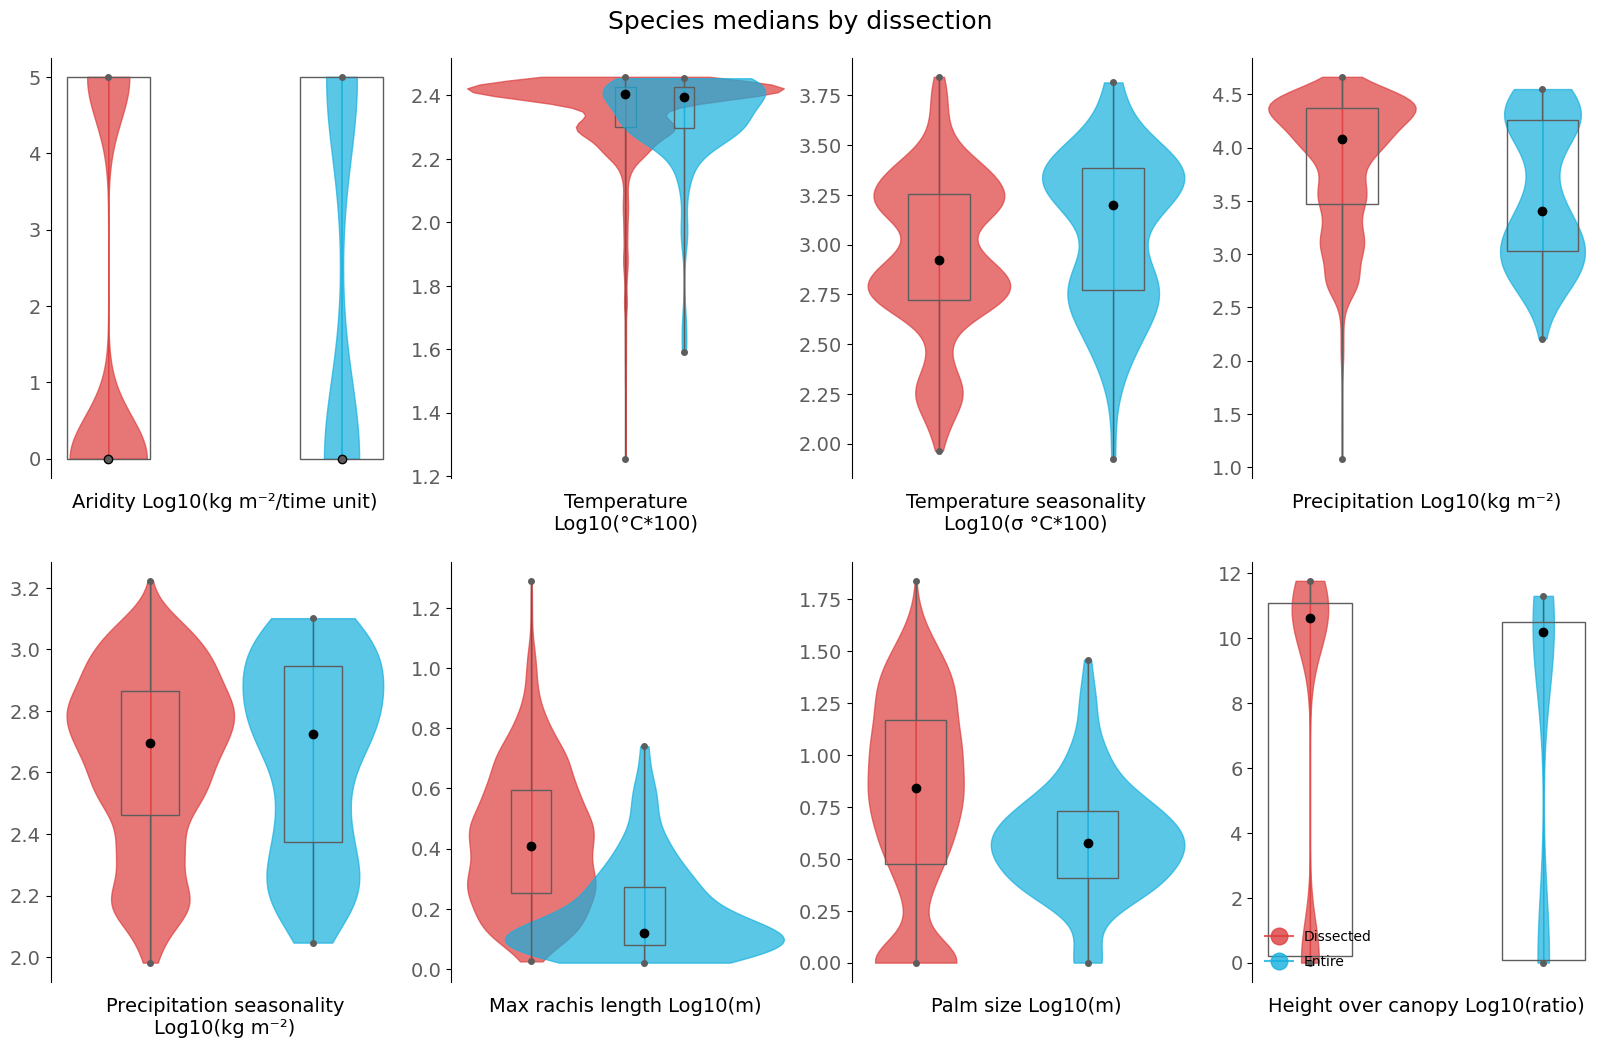

In [96]:
cols=4
rows=2

fig=plt.figure(figsize=(10*(rows),3*(cols)),facecolor='w')
fig.suptitle('Species medians by dissection', size=18,y=0.92,fontname='arial')
outer_grid=gridspec.GridSpec(rows,cols, wspace=0.15, hspace=0.2) # nrows, ncols
outer_grid.tight_layout(fig,rect=[0, 0.04, 1, 0.96]) #rect=[0, 0.03, 1, 0.95]

# shape_colour_dict={'cospalmate':"#1586DE", #light blue
# 'entire':'#02c39a', # now greensih, old: "#003480", # dark blue
# 'pinnate':"#dd3d3d",
# 'variable':"#fbe279"}

shape_colour_dict={1:"#DD3D3D", # dissected
                    0:"#15B0DE"} # entire

shape_text_dict={1:'Dissected',
                 0:'Entire'}

variables=['CHELSA_ai','CHELSA_bio1','CHELSA_bio4','CHELSA_bio12','CHELSA_bio15',
           'Max_Rachis_Length_m','StemHeightBladeLength','HeightOverCanopy']

variable_dict={'CHELSA_ai':'Aridity Log10(kg m\u207B\u00b2/time unit)',
               'CHELSA_bio1':'Temperature\nLog10(\u00B0C*100)',
               'CHELSA_bio4':'Temperature seasonality\nLog10(\u03C3 \u00B0C*100)',
               'CHELSA_bio12':u'Precipitation Log10(kg m\u207B\u00b2)',
               'CHELSA_bio15':u'Precipitation seasonality\nLog10(kg m\u207B\u00b2)',
               'Max_Rachis_Length_m':'Max rachis length Log10(m)',
               'StemHeightBladeLength': 'Palm size Log10(m)',
               'HeightOverCanopy':'Height over canopy Log10(ratio)'}


width=1
linewidth=1
boxcolor='#5e5d5d'
xplus=2.8

for xx in range(0,4,1):
    ax=plt.subplot(outer_grid[0,xx])
    x=0
    for shape in shape_colour_dict.keys():
        temp=intreebckp[intreebckp['disVent']==shape][[variables[xx],'disVent','species']]
        try:
    #         print(temp[variables[xx]].isna().describe())
            kde_plot(x,temp[variables[xx]],alpha=0.7,
                     edgecolor=shape_colour_dict[shape],
                     facecolor=shape_colour_dict[shape],linewidth=linewidth,ax=ax)
            # boxes
            boxes(x,temp[variables[xx]],ax=ax,color='#5e5d5d')
            [ax.spines[loc].set_visible(False) for loc in ['top','right','bottom']];ax.set_xticklabels([])
            ax.tick_params(axis='x', which='both',top=False,bottom=False,right=False) # bottom=False,labelbottom=False
            plt.yticks(fontsize=14, color=boxcolor)
            plt.xlabel(variable_dict[variables[xx]],fontsize=14)
        except:
            print(shape,variables[xx],len(temp[variables[xx]]),temp[variables[xx]].std())
        x+=xplus
        
for xx in range(4,8,1):
    ax=plt.subplot(outer_grid[1,xx-4])
    x=0
    for shape in shape_colour_dict.keys():
        temp=intreebckp[intreebckp['disVent']==shape][[variables[xx],'disVent','species']]
        try:
#             print(temp[variables[xx]].isna().describe())
            kde_plot(x,temp[variables[xx]],alpha=0.7,
                     edgecolor=shape_colour_dict[shape],
                     facecolor=shape_colour_dict[shape],linewidth=linewidth,ax=ax)
            # boxes
            boxes(x,temp[variables[xx]],ax=ax,color='#5e5d5d')
            [ax.spines[loc].set_visible(False) for loc in ['top','right','bottom']];ax.set_xticklabels([])
            ax.tick_params(axis='x', which='both',top=False,bottom=False,right=False) # bottom=False,labelbottom=False
            plt.yticks(fontsize=14, color=boxcolor)
            plt.xlabel(variable_dict[variables[xx]],fontsize=14)
        except:
            print(shape,variables[xx],len(temp[variables[xx]]),temp[variables[xx]].std())
        x+=xplus
    if xx == 7:
        legend_elements=[]
        for key,value in shape_colour_dict.items():
            legend_elements.append(Line2D([0],[0],marker='o',color=value,label=shape_text_dict[key],markersize=12,alpha=0.8))
        ax.legend(handles=legend_elements, loc=3,labelspacing=0.8,frameon=False)
    ax.plot()
plt.savefig('../figures/Fig_boxplots_disVent_20230110.pdf',dpi=300)
plt.show()

In [75]:
# asemusse_leafShape.groupby
summarymedian=intreebckp.groupby(by='pinVpal', dropna=True)[variables].median().apply(lambda x: 10**x).copy(deep=True)
summarymin=intreebckp.groupby(by='pinVpal', dropna=True)[variables].min().apply(lambda x: 10**x).copy(deep=True)
summarymax=intreebckp.groupby(by='pinVpal', dropna=True)[variables].max().apply(lambda x: 10**x).copy(deep=True)

summarydata=summarymedian.copy(deep=True)
summarydata['count']=''
summarydata['percent']=''
for shape in intreebckp['pinVpal'].dropna().unique():
    for var in ['CHELSA_ai','CHELSA_bio1','CHELSA_bio4','CHELSA_bio12','CHELSA_bio15',
               'Max_Rachis_Length_m','StemHeightBladeLength','HeightOverCanopy']:
        median='{:.2e}'.format(summarymedian.loc[shape,var])
        minval='{:.2e}'.format(summarymin.loc[shape,var])
        maxval='{:.2e}'.format(summarymax.loc[shape,var])
        rangeval='{:.2e}'.format(summarymax.loc[shape,var]-summarymin.loc[shape,var])
        summarydata.loc[shape,var]=u'%s (%s - %s) \u0394 %s'%(median,minval,maxval,rangeval)
    # total samples in tree and with data: 2057
    summarydata.loc[shape,'count']=len(intreebckp[intreebckp['pinVpal']==shape])
    summarydata.loc[shape,'percent']='%.2f'%((len(intreebckp[intreebckp['pinVpal']==shape])*100)/2057)
    
summarydata.to_csv('../data_files/variable_summary-by_pinVpal_cientificnotation_20230109.csv',sep='\t')
summarydata

,CHELSA_ai,CHELSA_bio1,CHELSA_bio4,CHELSA_bio12,CHELSA_bio15,Max_Rachis_Length_m,StemHeightBladeLength,HeightOverCanopy,count,percent
pinVpal,,,,,,,,,,
0,1.00e+00 (1.00e+00 - 1.00e+05) Δ 1.00e+05,2.14e+02 (4.45e+01 - 2.74e+02) Δ 2.30e+02,1.47e+03 (1.09e+02 - 5.61e+03) Δ 5.50e+03,9.06e+03 (9.60e+01 - 4.45e+04) Δ 4.44e+04,4.10e+02 (1.08e+02 - 1.67e+03) Δ 1.56e+03,2.40e+00 (1.29e+00 - 8.00e+00) Δ 6.71e+00,6.77e+00 (1.00e+00 - 4.87e+01) Δ 4.77e+01,7.00e+10 (1.00e+00 - 4.71e+11) Δ 4.71e+11,446,21.68
1,1.00e+00 (1.00e+00 - 1.00e+05) Δ 1.00e+05,2.56e+02 (1.80e+01 - 2.88e+02) Δ 2.70e+02,7.77e+02 (8.40e+01 - 6.97e+03) Δ 6.89e+03,1.20e+04 (1.20e+01 - 4.63e+04) Δ 4.62e+04,5.15e+02 (9.60e+01 - 1.38e+03) Δ 1.29e+03,2.50e+00 (1.05e+00 - 1.95e+01) Δ 1.85e+01,6.50e+00 (1.00e+00 - 6.91e+01) Δ 6.81e+01,3.10e+10 (1.00e+00 - 5.82e+11) Δ 5.82e+11,1609,78.22


findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.
findfont: Font family 'arial' not found.


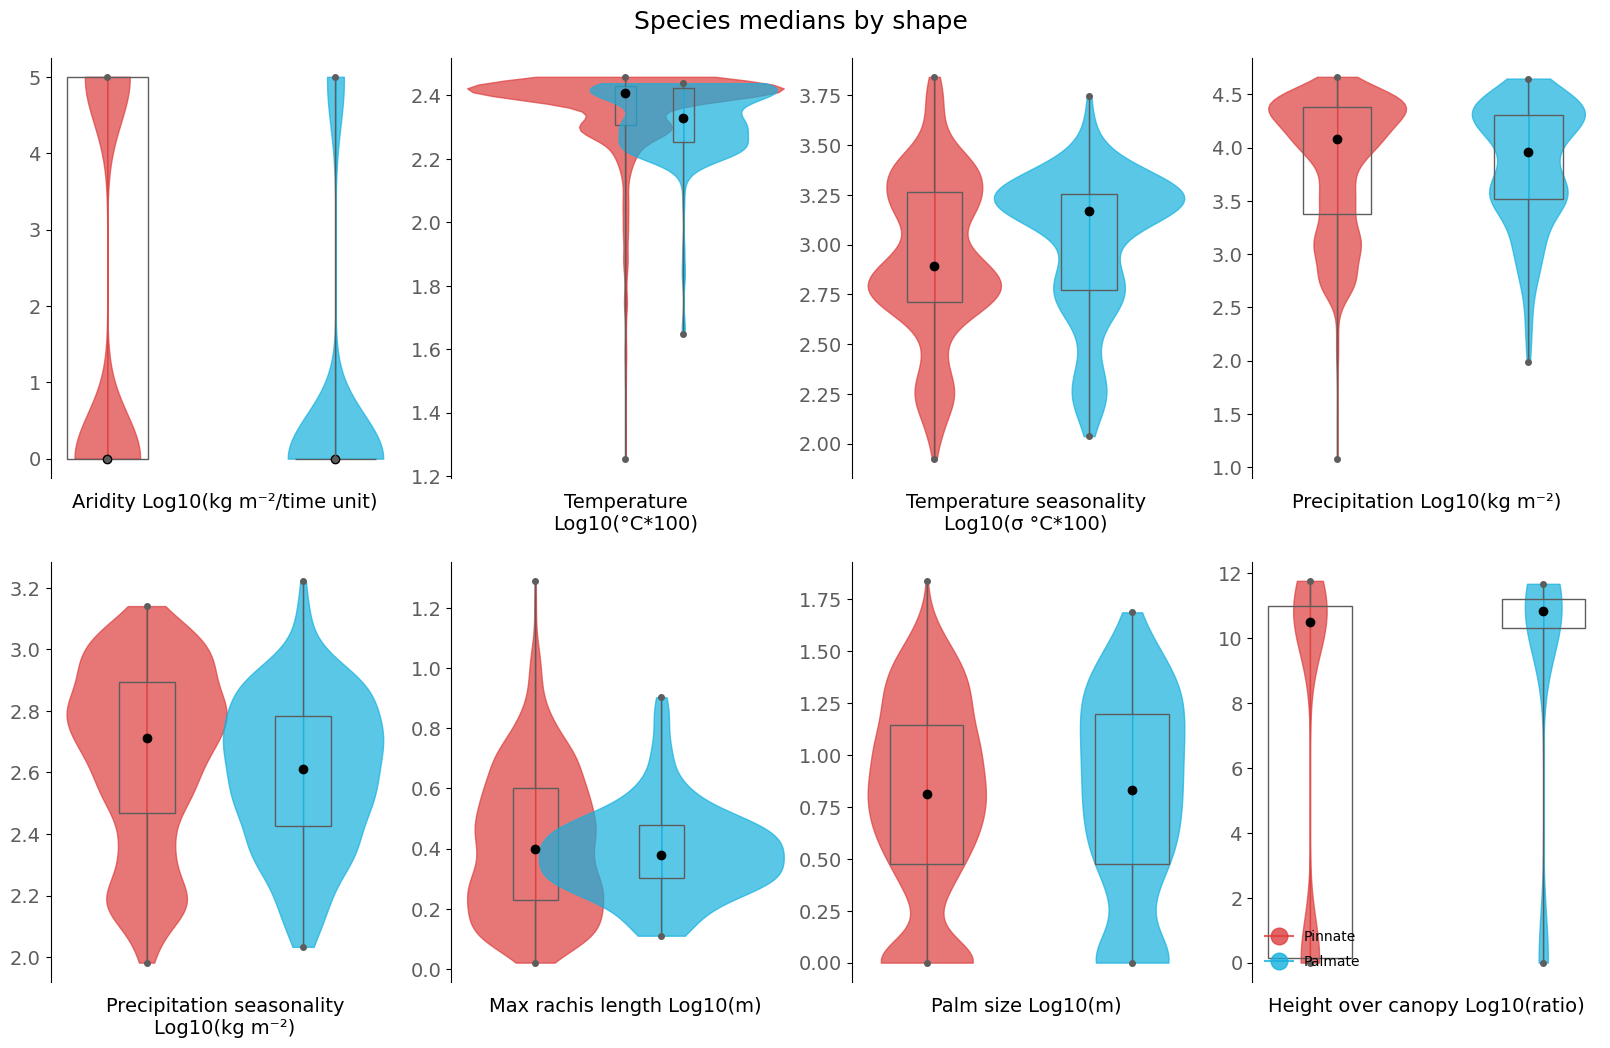

In [97]:
cols=4
rows=2

fig=plt.figure(figsize=(10*(rows),3*(cols)),facecolor='w')
fig.suptitle('Species medians by shape', size=18,y=0.92,fontname='arial')
outer_grid=gridspec.GridSpec(rows,cols, wspace=0.15, hspace=0.2) # nrows, ncols
outer_grid.tight_layout(fig,rect=[0, 0.04, 1, 0.96]) #rect=[0, 0.03, 1, 0.95]

# shape_colour_dict={'cospalmate':"#1586DE", #light blue
# 'entire':'#02c39a', # now greensih, old: "#003480", # dark blue
# 'pinnate':"#dd3d3d",
# 'variable':"#fbe279"}

shape_colour_dict={1:"#DD3D3D", # dissected
                    0:"#15B0DE"} # entire

shape_text_dict={1:'Pinnate',
                 0:'Palmate'}

variables=['CHELSA_ai','CHELSA_bio1','CHELSA_bio4','CHELSA_bio12','CHELSA_bio15',
           'Max_Rachis_Length_m','StemHeightBladeLength','HeightOverCanopy']

variable_dict={'CHELSA_ai':'Aridity Log10(kg m\u207B\u00b2/time unit)',
               'CHELSA_bio1':'Temperature\nLog10(\u00B0C*100)',
               'CHELSA_bio4':'Temperature seasonality\nLog10(\u03C3 \u00B0C*100)',
               'CHELSA_bio12':u'Precipitation Log10(kg m\u207B\u00b2)',
               'CHELSA_bio15':u'Precipitation seasonality\nLog10(kg m\u207B\u00b2)',
               'Max_Rachis_Length_m':'Max rachis length Log10(m)',
               'StemHeightBladeLength': 'Palm size Log10(m)',
               'HeightOverCanopy':'Height over canopy Log10(ratio)'}


width=1
linewidth=1
boxcolor='#5e5d5d'
xplus=2.8

for xx in range(0,4,1):
    ax=plt.subplot(outer_grid[0,xx])
    x=0
    for shape in shape_colour_dict.keys():
        temp=intreebckp[intreebckp['pinVpal']==shape][[variables[xx],'pinVpal','species']]
        try:
    #         print(temp[variables[xx]].isna().describe())
            kde_plot(x,temp[variables[xx]],alpha=0.7,
                     edgecolor=shape_colour_dict[shape],
                     facecolor=shape_colour_dict[shape],linewidth=linewidth,ax=ax)
            # boxes
            boxes(x,temp[variables[xx]],ax=ax,color='#5e5d5d')
            [ax.spines[loc].set_visible(False) for loc in ['top','right','bottom']];ax.set_xticklabels([])
            ax.tick_params(axis='x', which='both',top=False,bottom=False,right=False) # bottom=False,labelbottom=False
            plt.yticks(fontsize=14, color=boxcolor)
            plt.xlabel(variable_dict[variables[xx]],fontsize=14)
        except:
            print(shape,variables[xx],len(temp[variables[xx]]),temp[variables[xx]].std())
        x+=xplus
        
for xx in range(4,8,1):
    ax=plt.subplot(outer_grid[1,xx-4])
    x=0
    for shape in shape_colour_dict.keys():
        temp=intreebckp[intreebckp['pinVpal']==shape][[variables[xx],'pinVpal','species']]
        try:
#             print(temp[variables[xx]].isna().describe())
            kde_plot(x,temp[variables[xx]],alpha=0.7,
                     edgecolor=shape_colour_dict[shape],
                     facecolor=shape_colour_dict[shape],linewidth=linewidth,ax=ax)
            # boxes
            boxes(x,temp[variables[xx]],ax=ax,color='#5e5d5d')
            [ax.spines[loc].set_visible(False) for loc in ['top','right','bottom']];ax.set_xticklabels([])
            ax.tick_params(axis='x', which='both',top=False,bottom=False,right=False) # bottom=False,labelbottom=False
            plt.yticks(fontsize=14, color=boxcolor)
            plt.xlabel(variable_dict[variables[xx]],fontsize=14)
        except:
            print(shape,variables[xx],len(temp[variables[xx]]),temp[variables[xx]].std())
        x+=xplus
    if xx == 7:
        legend_elements=[]
        for key,value in shape_colour_dict.items():
            legend_elements.append(Line2D([0],[0],marker='o',color=value,label=shape_text_dict[key],markersize=12,alpha=0.8))
        ax.legend(handles=legend_elements, loc=3,labelspacing=0.8,frameon=False)
    ax.plot()
plt.savefig('../figures/Fig_boxplots_pinVpal_20230110.pdf',dpi=300)
plt.show()

# Exploring height over canopy and its descriptive thresholds

In [111]:
# looking only at species in the tree that have data
print([x if 'anop' in str(x) else '' for x in intree.columns])

['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'UnderstoreyCanopy', '', 'HeightOverCanopy', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'HeightOverCanopy_stand', 'UnderstoreyCanopy_num']


In [113]:
intree[['HeightOverCanopy','HeightOverCanopy_stand']].describe()**10 # reverse log10

,HeightOverCanopy,HeightOverCanopy_stand
count,8.427030e+31,8.427030e+31
mean,5.326748e+08,8.163487e-19
std,9.940894e+06,9.339898e-01
min,0.000000e+00,4.503295e+01
25%,2.644543e-08,3.544073e+01
50%,1.737845e+10,1.019198e-02
75%,2.701416e+10,4.105419e-02
max,5.080318e+10,2.468608e-01


In [166]:
def kde_ploth(data, size, ax):
    """
    where data is a pandas dataframe, single column
    size of the distribution range, two-tailed, that is not significant if overlaps 0
    """
    # gathers values, to floats, drops nans
    size = size
    ax = ax
    values = data.dropna().astype('float').values
    
    # gets boundaries
    data025 = data.quantile(0+(1-size)/2)
    data975 = data.quantile(1-(1-size)/2)
#     print(data025,data975)

    # within range size
    kde = gaussian_kde(values)
    x_grid = np.linspace(min(values),max(values),100)
    ax.fill_between(x_grid, kde(x_grid),
                    alpha = 1, edgecolor = 'none',
                    facecolor = '#DD3D3D')
    ax.fill_between(x_grid, kde(x_grid),
                    where = [data025 <= x <= data975 for x in x_grid],
                    alpha = 1, edgecolor = 'none',
                    facecolor = '#bababa')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    return ax

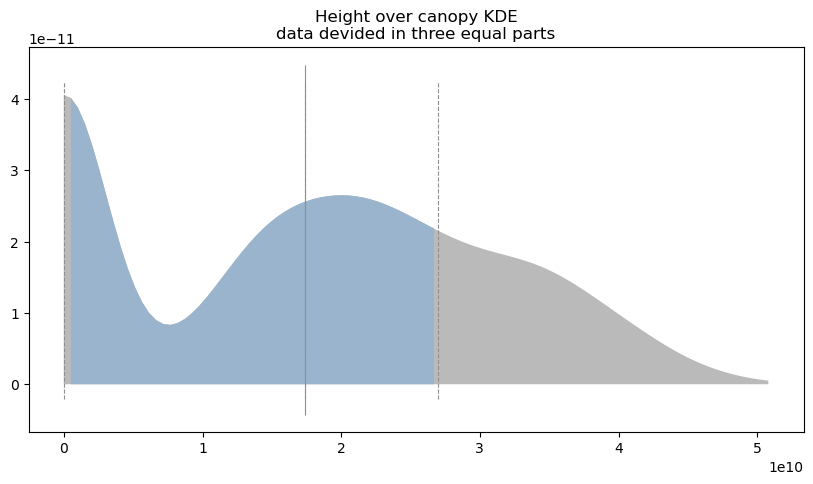

In [188]:
fig,ax = plt.subplots(figsize=(10,5), facecolor='w')

bktrnfrmd=intree['HeightOverCanopy']**10 # backtransformed from log10 with **10

# kde_ploth(bktrnfrmd,1/3,ax=ax)
# kde_ploth(bktrnfrmd,0.75,ax=ax)

kde = gaussian_kde(bktrnfrmd.dropna())
x_grid = np.linspace(min(bktrnfrmd.dropna()),max(bktrnfrmd.dropna()),100)
ax.fill_between(x_grid, kde(x_grid),
                alpha = 1, edgecolor = 'none',
                facecolor = '#bababa')
ax.fill_between(x_grid, kde(x_grid),
                alpha = 1, edgecolor = 'none',
                where = [np.quantile(bktrnfrmd.dropna(),0.25) <= x <= np.quantile(bktrnfrmd.dropna(),0.75) for x in x_grid],
                facecolor = '#99b4cc')

ax.vlines([np.quantile(bktrnfrmd.dropna(),x) for x in [0.25,0.50,0.75]],
         ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1],
         color='#8f8f8f', lw=0.8, ls='--')

ax.vlines([bktrnfrmd.median()],
         ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1],
         color='#8f8f8f', lw=0.8)

plt.title('Height over canopy KDE\ndata devided in three equal parts')
plt.show()

In [182]:
kde = gaussian_kde(bktrnfrmd.dropna())
x_grid = np.linspace(min(bktrnfrmd.dropna()),max(bktrnfrmd.dropna()),100)
print(['{:.2e}'.format(np.quantile(bktrnfrmd.dropna(),x)) for x in [0.25,0.50,0.75]])

['2.65e-08', '1.74e+10', '2.70e+10']


In [148]:
print('median: ','{:.2e}'.format(intree['HeightOverCanopy'].median()**10),'\n',
      'mean: ', '{:.2e}'.format(intree['HeightOverCanopy'].mean()**10))

['8.97e+09', '2.35e+10', '5.08e+10']
median:  1.74e+10 
 mean:  5.33e+08
